Author: Huachuan Qiu

Student ID: 12163193

Date: 2022-3-10

Description: I use `data_preparation.py` to generate the training samples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_array_with_degree(x, degree):
    '''
    根据degree构造关于x的一维向量
    '''
    one_dim_arr = []
    for i in range(degree+1):
        one_dim_arr.append(x**i)
    return one_dim_arr

In [3]:
# 生成golden data
golden_data_x = []
golden_data_y = []
for x in np.arange(0.0, 1.0, 0.01):
    y = np.sin(2*np.pi*x)
    golden_data_x.append(x)
    golden_data_y.append(y)

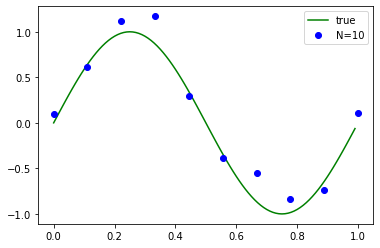

In [4]:
# 绘制y=sin(x)曲线和采样得到的10个样本数据
df = pd.read_csv('./data/examples_10.csv')
plt.plot(golden_data_x, golden_data_y, 'g', label='true')
plt.plot(df.x, df.y, 'bo', label='N=10')
plt.legend()
plt.show()

In [5]:
def calculate_w(degree, df):
    '''
    计算权重系数
    '''
    data = []
    y_values = []
    for x in df.x:
        one_dim_arr = generate_array_with_degree(x, degree)
        data.append(one_dim_arr)
    for y in df.y:
        y_values.append(y)

    P = np.array(data)
    P_T = P.transpose()
    y = np.array(y_values)
    
    w = np.matmul((np.matmul(np.linalg.inv(np.matmul(P_T, P)), P_T)), y)
    return w

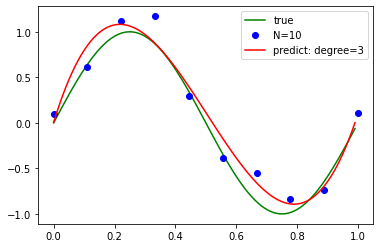

In [6]:
predicted_w = calculate_w(3, df)
predicted_y = []
for x in np.arange(0.0, 1.0, 0.01):
    one_dim_arr = generate_array_with_degree(x, 3)
    x_vector = np.array(one_dim_arr)
    predicted_y.append(np.matmul(predicted_w, x_vector.transpose()))

plt.plot(golden_data_x, golden_data_y, 'g', label='true')
plt.plot(df.x, df.y, 'bo', label='N=10')
plt.plot(golden_data_x, predicted_y, 'r', label='predict: degree=3')
plt.legend()
plt.show()

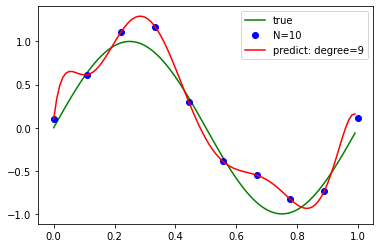

In [7]:
predicted_w = calculate_w(9, df)
predicted_y = []
for x in np.arange(0.0, 1.0, 0.01):
    one_dim_arr = generate_array_with_degree(x, 9)
    x_vector = np.array(one_dim_arr)
    predicted_y.append(np.matmul(predicted_w, x_vector.transpose()))

plt.plot(golden_data_x, golden_data_y, 'g', label='true')
plt.plot(df.x, df.y, 'bo', label='N=10')
plt.plot(golden_data_x, predicted_y, 'r', label='predict: degree=9')
plt.legend()
plt.show()

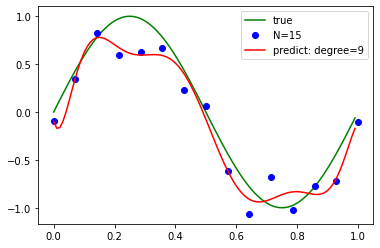

In [8]:
df_15 = pd.read_csv('./data/examples_15.csv')

predicted_w = calculate_w(9, df_15)
predicted_y = []
for x in np.arange(0.0, 1.0, 0.01):
    one_dim_arr = generate_array_with_degree(x, 9)
    x_vector = np.array(one_dim_arr)
    predicted_y.append(np.matmul(predicted_w, x_vector.transpose()))

plt.plot(golden_data_x, golden_data_y, 'g', label='true')
plt.plot(df_15.x, df_15.y, 'bo', label='N=15')
plt.plot(golden_data_x, predicted_y, 'r', label='predict: degree=9')
plt.legend()
plt.show()

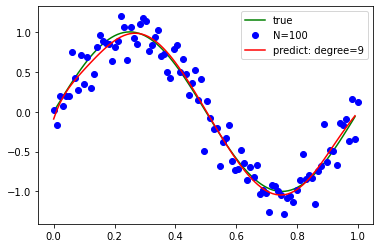

In [9]:
df_100 = pd.read_csv('./data/examples_100.csv')

predicted_w = calculate_w(9, df_100)
predicted_y = []
for x in np.arange(0.0, 1.0, 0.01):
    one_dim_arr = generate_array_with_degree(x, 9)
    x_vector = np.array(one_dim_arr)
    predicted_y.append(np.matmul(predicted_w, x_vector.transpose()))

plt.plot(golden_data_x, golden_data_y, 'g', label='true')
plt.plot(df_100.x, df_100.y, 'bo', label='N=100')
plt.plot(golden_data_x, predicted_y, 'r', label='predict: degree=9')
plt.legend()
plt.show()

In [10]:
def calculate_w_with_lamda(degree, df, param_lamda):
    '''
    计算权重系数
    '''
    data = []
    y_values = []
    for x in df.x:
        one_dim_arr = generate_array_with_degree(x, degree)
        data.append(one_dim_arr)
    for y in df.y:
        y_values.append(y)
    
    I = np.identity(degree+1)

    P = np.array(data)
    P_T = P.transpose()
    y = np.array(y_values)
    
    w = np.matmul((np.matmul(np.linalg.inv(np.matmul(P_T, P)+param_lamda*I), P_T)), y)
    return w

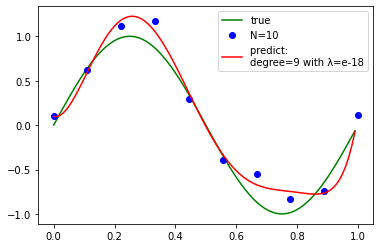

In [11]:
df_10 = pd.read_csv('./data/examples_10.csv')

predicted_w = calculate_w_with_lamda(9, df_10, np.exp(-18))
predicted_y = []
for x in np.arange(0.0, 1.0, 0.01):
    one_dim_arr = generate_array_with_degree(x, 9)
    x_vector = np.array(one_dim_arr)
    predicted_y.append(np.matmul(predicted_w, x_vector.transpose()))

plt.plot(golden_data_x, golden_data_y, 'g', label='true')
plt.plot(df_10.x, df_10.y, 'bo', label='N=10')
plt.plot(golden_data_x, predicted_y, 'r', label='predict: \ndegree=9 with λ=e-18')
plt.legend()
plt.show()